# Base

### *Navigating Invisible Adversaries in an Imperfect Network*

In some lives, the early architecture of experience is built on clarity. Objectives are explicit, pathways well-lit, and the rules of engagement universally understood. Whether it is academic achievement or team sports, the parameters are transparent, the stakes known, and the outcomes measurable. In such environments, even the concept of competition feels orderly, bounded by shared constraints and mutual objectives. One can thrive in these spaces, honing skills, testing strategies, and achieving success within a system that feels predictable, almost mathematical in its precision.

Consider the game of rugby, where fifteen players align themselves in pursuit of a single, undeniable goal: scoring more tries than the opposition. Each team, while competing, operates within a closed framework. The resources—players, tactics, and field conditions—are visible. The data is shared. The objectives, unambiguous. Even the element of surprise, like premeditated plays cloaked in code names, emerges from a finite set of possibilities. Compression happens, yes, but it is a compression of patterns into a manageable matrix of options. The space of possibilities is large enough for creativity, but small enough to maintain clarity.

But what happens when one leaves these controlled environments? When the architecture of experience shifts to one of uncertainty, and the elegant clarity of rugby’s compression gives way to the labyrinthine ambiguity of professional life? The rules, if they exist at all, are unspoken. The objectives are opaque. The players, though ostensibly on the same side, may not share your goals—or may actively oppose them. The data you rely on to interpret this new game is incomplete, fragmented, and often contradictory. Worse, you may not even know that a game is being played, or that you are a piece on the board.

For someone whose early life unfolded within well-structured systems of optimization—where success was achieved by maximizing clear outputs like grades, accolades, or scores—this shift feels disorienting, even destabilizing. In the workplace, one encounters not adversaries across a defined line, but within one’s own supposed team. A colleague who smiles in meetings might, unbeknownst to you, be orchestrating moves against your position. The resources they control, the networks they leverage, and the objectives they pursue remain hidden. It is a game of imperfect information, where you are both a participant and an observer, often without consent or comprehension.

Here, compression takes on an entirely new character. It is no longer a tidy reduction of known inputs into predictable outputs, but a chaotic amalgamation of unseen forces into a web of uncertainty. The adversarial nodes in this network are not easily identifiable, their activations silent and subtle. They operate in shadows, weaving pathways you cannot map. The sense of control that once defined your world begins to erode.

To navigate such complexity requires a new kind of learning, a skill set not taught in school or forged on the rugby field. It demands an ability to operate in the dark, to recognize patterns without full data, and to anticipate moves without understanding the players’ motivations. It is a test not only of strategy but of perception, adaptability, and resilience. And for someone encountering these challenges later in life, the process can feel less like a progression and more like an upheaval.

Yet, there is power in recognizing the nature of this new game. To see the invisible adversaries, to discern their hidden optimizations, is the first step toward reclaiming agency. The task is not to master the system immediately—it is far too vast and fluid for that—but to develop a framework for interpreting its movements. To accept the imperfections of the network and learn to thrive within its uncertainty.

In this sense, the challenge of imperfect information is not merely an external struggle but an internal evolution. It forces one to confront the dormant adversarial nodes within, to awaken the cognitive pathways that were never activated in the simplicity of earlier systems. It is a journey from clarity to complexity, from linear optimization to dynamic navigation, and, ultimately, from the known to the unknown.

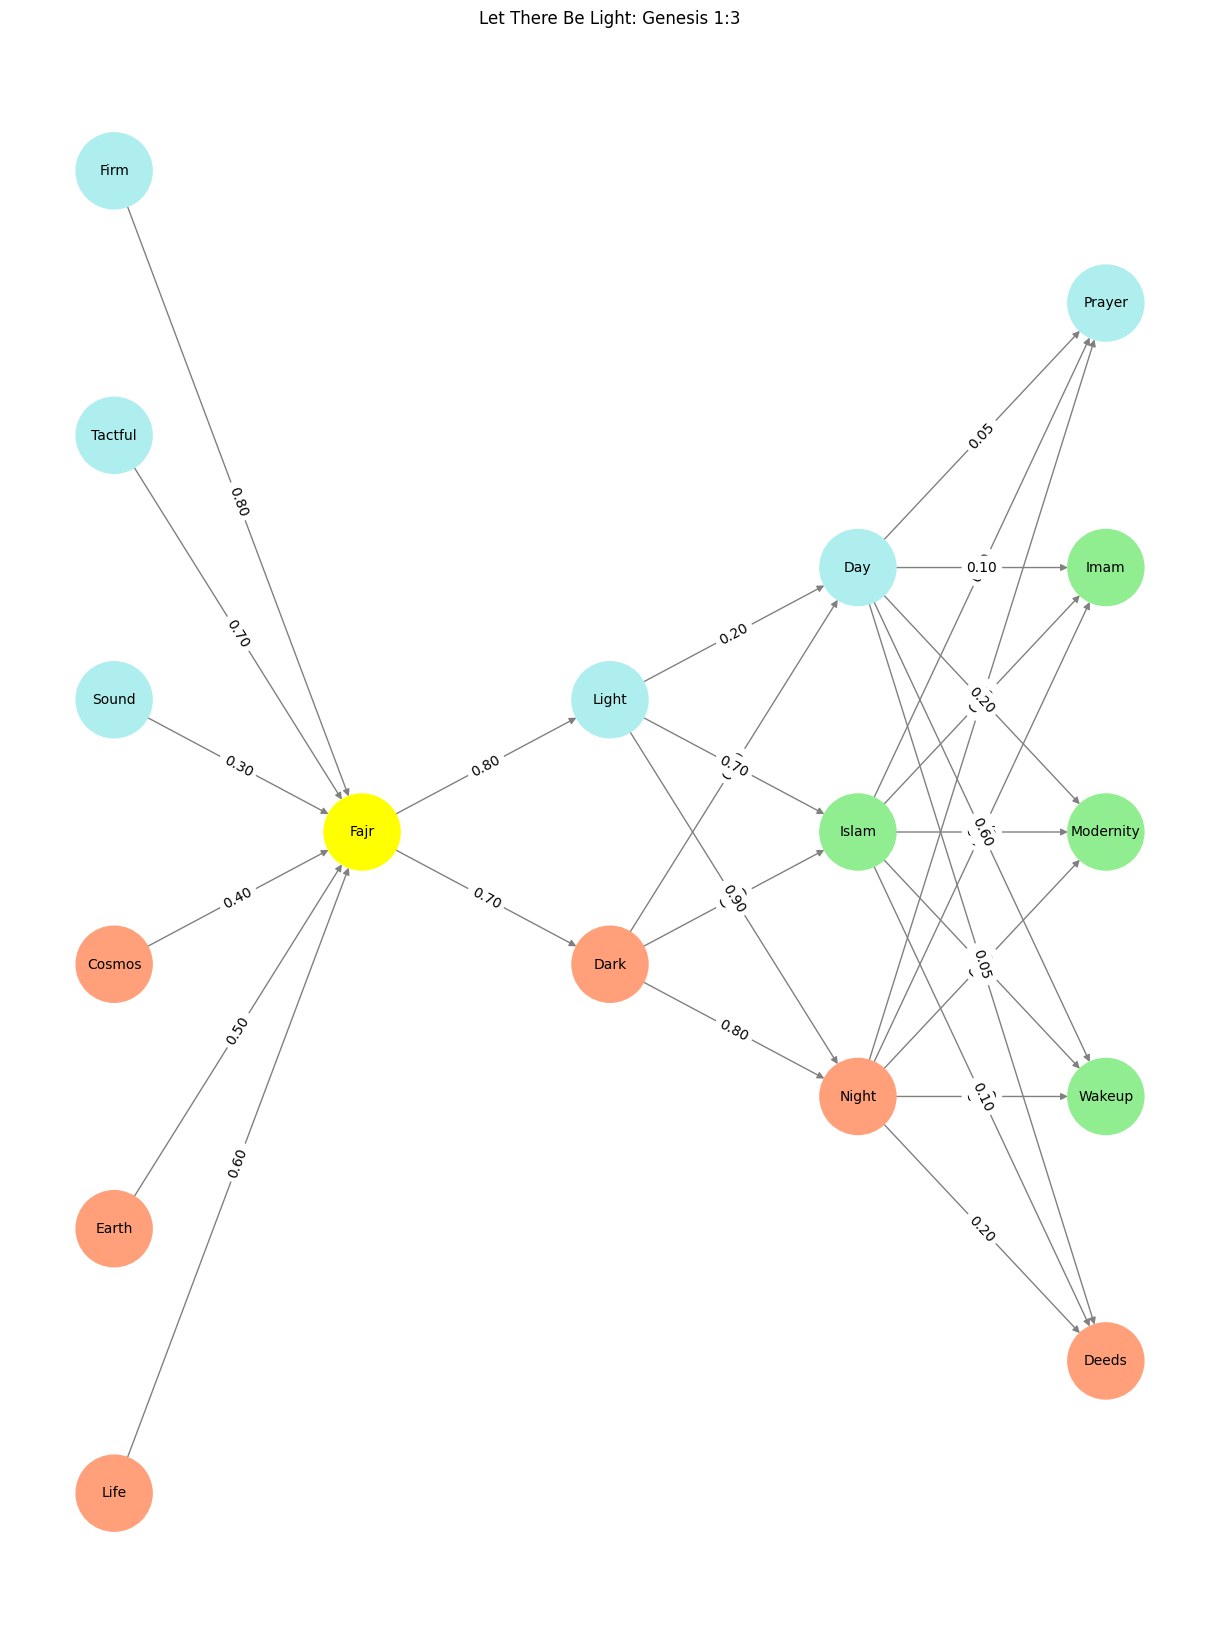

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Fajr'],
        'Input': ['Dark', 'Light'],
        'Hidden': [
            'Night',
            'Islam',
            'Day',
        ],
        'Output': ['Deeds', 'Wakeup', 'Modernity', 'Imam', 'Prayer',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Fajr':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Light':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Day':
            return 'paleturquoise'
        elif node == 'Islam':
            return 'lightgreen'
        elif node == 'Night':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Prayer':
            return 'paleturquoise'
        elif node in ['Imam', 'Modernity', 'Wakeup']:
            return 'lightgreen'
        elif node == 'Deeds':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Let There Be Light: Genesis 1:3")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

#


```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
Paleturquoise, lightgreen, lightsalmon: _Paradiso_, _Purgatorio_, _Inferno_. The color-coding corresponds to Dante's *Magna Opera* {cite}`alighieri1984paradiso` {cite}`alighieri1984purgatorio` {cite}`alighieri1984inferno`. And the lightgray represents the raw, unprocessed, yet-to-be transformed inputs. These triadic themes spawn an unlimited number of variants. For instance, the adversary-identity-tokenization-joy nodes can be thought of as [tragical-comical-historical-pastoral](https://www.gutenberg.org/files/1524/1524-h/1524-h.htm). They align with the tragedy of commons, mistaken identity as the most accessible resource for comedy, and the history of mankind being a story of encoding everything into symbol, language, token, and commodity to facilitate dialogue
```